# <center>M1.3 Transformaciones e Inferencia Estadística</center>
### <center>Alejandro Sánchez Flores - A01662783</center>

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

### 1.

In [2]:
# CARGAMOS EL DATASET
df_empleados = pd.read_excel(r'./Insumos/Actividad Transformaciones e Inferencia Estadística.xlsx', sheet_name='t_empleados')
df_empleados.head(10)

,Empleado,Salario,Costo de Capacitación,Producción Generada,Satisfacción del Cliente Interna,Ventas Generadas,Ausentismo
0,Empleado 1,4620,354,10001,7,80014,5
1,Empleado 2,5100,499,9800,8,75000,6
2,Empleado 3,4550,450,9500,6,69000,4
3,Empleado 4,4751,470,9999,9,71000,3
4,Empleado 5,4848,380,9750,7,76500,2
5,Empleado 6,4932,370,9680,6,79814,5
6,Empleado 7,5040,330,9786,8,77658,4
7,Empleado 8,4671,350,9650,5,78500,2
8,Empleado 9,4699,415,10100,9,73000,2
9,Empleado 10,4914,394,10050,10,74000,3


In [3]:
# GENERAMOS LA TABLA DE ESTADISTICAS DESCRIPTIVAS
tEstadisticas = df_empleados.describe().T

# CALCULAMOS LA MEDIANA PARA CADA VARIABLE
mediana = df_empleados.drop(columns=['Empleado']).median()
tEstadisticas['mediana'] = mediana

# CALCULAMOS LA MODA PARA CADA COLUMNA
moda = df_empleados.drop(columns=['Empleado']).mode().iloc[0]
tEstadisticas['moda'] = moda

# CALCULAMOS EL COEFICIENTE DE VARIACION PARA CADA COLUMNA
tEstadisticas['coef_var'] = tEstadisticas['std'] / tEstadisticas['mean']
tEstadisticas[['mean', 'mediana', 'moda', 'std', 'coef_var']]

,mean,mediana,moda,std,coef_var
Salario,4812.5,4799.5,4550.0,183.455868,0.038121
Costo de Capacitación,401.2,387.0,330.0,56.039272,0.139679
Producción Generada,9831.6,9793.0,9500.0,197.796865,0.020118
Satisfacción del Cliente Interna,7.5,7.5,6.0,1.581139,0.210819
Ventas Generadas,75448.6,75750.0,69000.0,3724.801805,0.049369
Ausentismo,3.6,3.5,2.0,1.429841,0.397178


In [4]:
# IDENTIFICAMOS LA VARIABLE CON MAYOR Y MENOR VARIABILIDAD
max_coef_var = tEstadisticas['coef_var'].idxmax()
min_coef_var = tEstadisticas['coef_var'].idxmin()

print(f'Variable con mayor variabilidad: {max_coef_var}')
print(f'Variable con menor variabilidad: {min_coef_var}')

Variable con mayor variabilidad: Ausentismo
Variable con menor variabilidad: Producción Generada


Para identificar cuál de las variables tiene mayor y menor variabilidad, utilizamos el `Coeficiente de variación`, que es una medida la cual nos indica la dispersión de los datos respecto a la media y en la cual se utiliza la siguiente fórmula:

$cv = \frac{std}{mean}$

In [5]:
# SE DEFINEN LOS RUBROS Y PESOS DE PARA CADA UNA DE LAS VARIABLES
dict_rubros = {'Salario':'menos es mejor','Costo de Capacitación':'menos es mejor','Producción Generada':'mas es mejor','Satisfacción del Cliente Interna':'mas es mejor','Ventas Generadas':'mas es mejor','Ausentismo':'menos es mejor'}
dict_pesos = {'Salario':0.06,'Costo de Capacitación':0.03,'Producción Generada':0.16,'Satisfacción del Cliente Interna':0.25,'Ventas Generadas':0.40,'Ausentismo':0.10}

print(dict_rubros)
print(dict_pesos)

{'Salario': 'menos es mejor', 'Costo de Capacitación': 'menos es mejor', 'Producción Generada': 'mas es mejor', 'Satisfacción del Cliente Interna': 'mas es mejor', 'Ventas Generadas': 'mas es mejor', 'Ausentismo': 'menos es mejor'}
{'Salario': 0.06, 'Costo de Capacitación': 0.03, 'Producción Generada': 0.16, 'Satisfacción del Cliente Interna': 0.25, 'Ventas Generadas': 0.4, 'Ausentismo': 0.1}


In [6]:
df_normalizada = df_empleados.copy()

# NORMALIZAMOS LOS DATOS SEGUN EL RUBRO "más es mejor" o "menos es mejor"
for col in df_normalizada.columns[1:]:
    if dict_rubros[col] == 'mas es mejor':
        df_normalizada[col] = (df_normalizada[col]) / (df_normalizada[col].max())
    elif dict_rubros[col] == 'menos es mejor':
        df_normalizada[col] = (df_normalizada[col].min()) / (df_normalizada[col])

    sumaCol = df_normalizada[col] / df_normalizada[col].sum()
    df_normalizada[col] = sumaCol

df_normalizada

,Empleado,Salario,Costo de Capacitación,Producción Generada,Satisfacción del Cliente Interna,Ventas Generadas,Ausentismo
0,Empleado 1,0.104031,0.111442,0.101723,0.093333,0.106051,0.061856
1,Empleado 2,0.094240,0.079059,0.099679,0.106667,0.099405,0.051546
2,Empleado 3,0.105632,0.087668,0.096627,0.080000,0.091453,0.077320
3,Empleado 4,0.101163,0.083937,0.101703,0.120000,0.094104,0.103093
4,Empleado 5,0.099139,0.103817,0.099170,0.093333,0.101394,0.154639
5,Empleado 6,0.097450,0.106623,0.098458,0.080000,0.105786,0.061856
6,Empleado 7,0.095362,0.119547,0.099536,0.106667,0.102928,0.077320
7,Empleado 8,0.102895,0.112716,0.098153,0.066667,0.104044,0.154639
8,Empleado 9,0.102282,0.095062,0.102730,0.120000,0.096755,0.154639
9,Empleado 10,0.097807,0.100128,0.102221,0.133333,0.098080,0.103093


In [7]:
# APLICAMOS LOS PESOS A LAS VARIABLES NORMALIZADAS
for col in df_normalizada.columns[1:]:
    df_normalizada[col] = df_normalizada[col] * dict_pesos[col]

df_normalizada

,Empleado,Salario,Costo de Capacitación,Producción Generada,Satisfacción del Cliente Interna,Ventas Generadas,Ausentismo
0,Empleado 1,0.006242,0.003343,0.016276,0.023333,0.042420,0.006186
1,Empleado 2,0.005654,0.002372,0.015949,0.026667,0.039762,0.005155
2,Empleado 3,0.006338,0.002630,0.015460,0.020000,0.036581,0.007732
3,Empleado 4,0.006070,0.002518,0.016272,0.030000,0.037642,0.010309
4,Empleado 5,0.005948,0.003115,0.015867,0.023333,0.040557,0.015464
5,Empleado 6,0.005847,0.003199,0.015753,0.020000,0.042314,0.006186
6,Empleado 7,0.005722,0.003586,0.015926,0.026667,0.041171,0.007732
7,Empleado 8,0.006174,0.003381,0.015704,0.016667,0.041618,0.015464
8,Empleado 9,0.006137,0.002852,0.016437,0.030000,0.038702,0.015464
9,Empleado 10,0.005868,0.003004,0.016355,0.033333,0.039232,0.010309


In [8]:
# CALCULAMOS LA PUNTUACION PARA CADA EMPLEADO
df_normalizada['Puntaje_Total'] = df_normalizada.iloc[:, 1:].sum(axis=1) * 100

# OBTENEMOS EL RANKING DE EMPLEADOS SEGUN SU PUNTAJE
df_ranking = df_normalizada[['Empleado', 'Puntaje_Total']].sort_values(by='Puntaje_Total', ascending=False).reset_index(drop=True)
df_ranking

,Empleado,Puntaje_Total
0,Empleado 9,10.959133
1,Empleado 10,10.810231
2,Empleado 5,10.428470
3,Empleado 4,10.281110
4,Empleado 7,10.080388
5,Empleado 8,9.900797
6,Empleado 1,9.780012
7,Empleado 2,9.555822
8,Empleado 6,9.329892
9,Empleado 3,8.874144


In [9]:
df_empleados_new = pd.DataFrame(
    {
    'Empleado': ['Empleado11', 'Empleado12', 'Empleado13'],
    'Salario': [4700, 4900, 4850],
    'Costo de Capacitación': [420, 450, 380],
    'Producción Generada': [9800, 9600, 10000],
    'Satisfacción del Cliente Interna': [8, 7, 8],
    'Ventas Generadas': ['', '', ''],
    'Ausentismo': [3, 5, 4]
    }
)

df_empleados_new

,Empleado,Salario,Costo de Capacitación,Producción Generada,Satisfacción del Cliente Interna,Ventas Generadas,Ausentismo
0,Empleado11,4700,420,9800,8,,3
1,Empleado12,4900,450,9600,7,,5
2,Empleado13,4850,380,10000,8,,4


In [10]:
# GENERAMOS EL CONJUNTO DE DATOS PREDICTORAS Y OBJETIVO
X = df_empleados[['Salario', 'Costo de Capacitación', 'Producción Generada', 'Satisfacción del Cliente Interna', 'Ausentismo']]
y = df_empleados['Ventas Generadas']

# ESCALAMOS LAS VARIABLES PREDICTORAS ANTES DE LA REGRESION
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# ESCALAMOS LOS DATOS DE LOS NUEVOS EMPLEADOS
X_new = df_empleados_new[['Salario', 'Costo de Capacitación', 'Producción Generada', 'Satisfacción del Cliente Interna', 'Ausentismo']]
X_new_scaled = scaler.transform(X_new)

# CREAMOS Y AJUSTAMOS EL MODELO DE REGRESION LINEAL
model = LinearRegression()
model.fit(X_scaled, y)

# REALIZAMOS LAS PREDICCIONES
y_pred = model.predict(X_new_scaled)

# AGREGAMOS LAS PREDICCIONES A LOS DATOS DE LOS NUEVOS EMPLEADOS
df_empleados_new['Ventas Generadas'] = y_pred
df_empleados_new[['Empleado', 'Ventas Generadas']]

,Empleado,Ventas Generadas
0,Empleado11,71178.649796
1,Empleado12,72703.543875
2,Empleado13,78412.096115


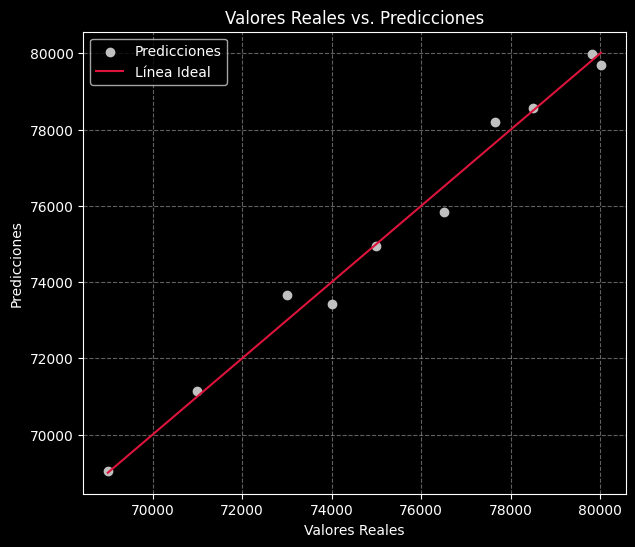

In [11]:
# VISUALIZAMOS LOS RESULTADOS (Valores Reales v Predicciones)
plt.figure(figsize=(7,6))
plt.scatter(y, model.predict(X_scaled), color='silver', label='Predicciones')
plt.plot([min(y), max(y)], [min(y), max(y)], color='crimson', label='Línea Ideal')
plt.grid(True, color='silver', linestyle='--', alpha=0.5)
plt.title("Valores Reales vs. Predicciones")
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.legend()
plt.show()

### 2.

In [12]:
# CARGAMOS EL DATASET
df_resistencia = pd.read_excel(r'./Insumos/Actividad Transformaciones e Inferencia Estadística.xlsx', sheet_name='Ejercicio 2')
df_resistencia.head(10)

,Resistencia Máxima
0,28.3
1,26.8
2,26.6
3,26.5
4,28.1
5,24.8
6,27.4
7,26.2
8,29.4
9,28.6


Ya que los valores que se obtuvieron en los resultados podrían tomar cualquier valor dentro de un rango determinado, estamos hablando de una `variable continua` 

In [13]:
# CALCULAMOS EL NUMERO DE CLASES USANDO LA REGLA DE STURGES
def reglaSturges(n):
    return int(np.ceil(np.log2(n) + 1))

# CALCULAMOS EL NUMERO DE CLASES USANDO LA REGLA DE SCOTT
def reglaScott(data):
    return int(np.ceil((max(data) - min(data)) / (3.5 * np.std(data) / (len(data) ** (1/3)))))

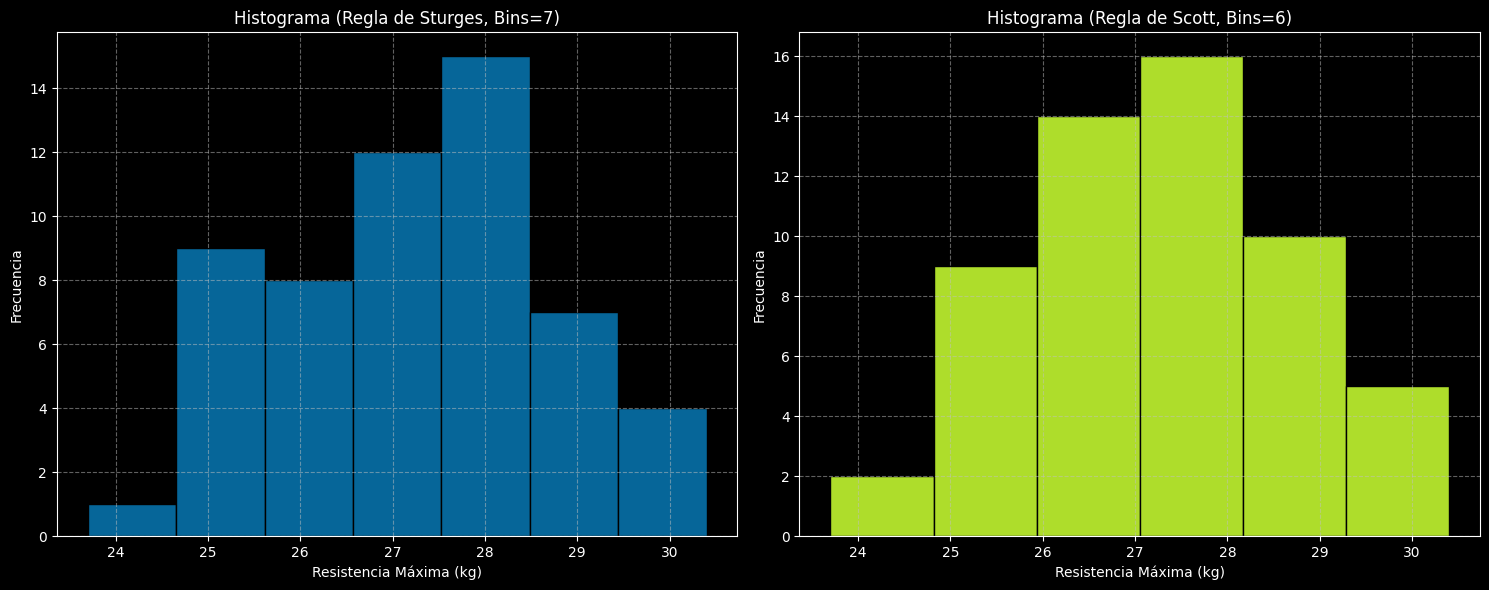

In [14]:
# POR REGLA DE STURGES
nSturges = reglaSturges(len(df_resistencia))

# POR REGLA DE SCOTT
nScott = reglaScott(df_resistencia['Resistencia Máxima'])

# Crear histogramas
plt.figure(figsize=(15,6))

# Histograma usando la Regla de Sturges
plt.subplot(1, 2, 1)
plt.hist(df_resistencia, bins=nSturges, color='#066699', edgecolor='black')
plt.title(f"Histograma (Regla de Sturges, Bins={nSturges})")
plt.grid(True, color='silver', linestyle='--', alpha=0.5)
plt.xlabel("Resistencia Máxima (kg)")
plt.ylabel("Frecuencia")

# Histograma usando la Regla de Scott
plt.subplot(1, 2, 2)
plt.hist(df_resistencia, bins=nScott, color='#aedd2b', edgecolor='black')
plt.grid(True, color='silver', linestyle='--', alpha=0.5)
plt.title(f"Histograma (Regla de Scott, Bins={nScott})")
plt.xlabel("Resistencia Máxima (kg)")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

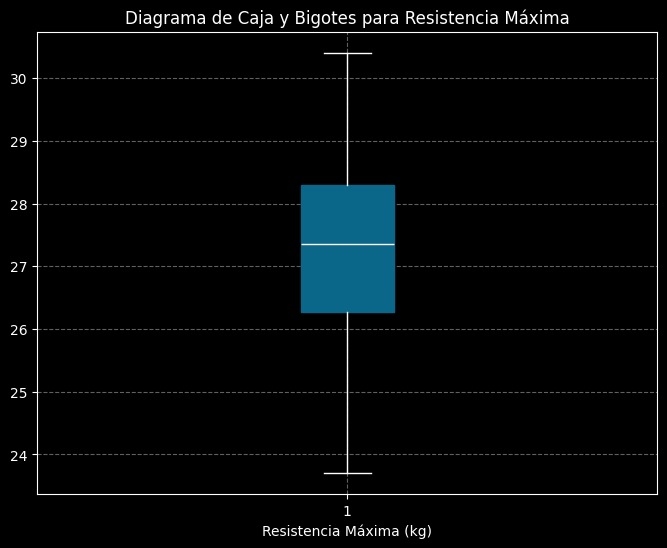

In [15]:
# Crear un diagrama de caja y bigotes
plt.figure(figsize=(8, 6))

box = plt.boxplot(df_resistencia['Resistencia Máxima'], vert=True, patch_artist=True)
plt.setp(box['medians'], color='white')
plt.setp(box['boxes'], color='#0a6789')
plt.grid(True, color='silver', linestyle='--', alpha=0.5)
plt.title("Diagrama de Caja y Bigotes para Resistencia Máxima")
plt.xlabel("Resistencia Máxima (kg)")
plt.show()

In [16]:
# SE CALCULA LA MEDIA Y LA DESVIACION ESTANDAR DE LOS DAOTS
meanResistencia = np.mean(df_resistencia['Resistencia Máxima'])
stdResistencia = np.std(df_resistencia, ddof=1)

# SE ESTABLECE UN NIVEL DE CONFIANZA DEL 94%
nivelConfianza = 0.94
alpha = 1 - nivelConfianza

# OBTENEMOS EL VALOR DE Z PARA EL NIVEL DE CONFIANZA
Z = stats.norm.ppf(1 - alpha/2)

# CALCULAMOS EL MARGEN DE ERROR
margenError = Z * (stdResistencia / np.sqrt(len(df_resistencia['Resistencia Máxima'])))

# CALCULAMOS EL INTERVALO DE CONFIANZA
intervaloConf = (meanResistencia - margenError, meanResistencia + margenError)

c:\Users\aless\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [17]:
print(f'Rango del intervalo de confianza: [{intervaloConf[0].values[0]}, {intervaloConf[1].values[0]}]')
print(f'Promedio de resistencia con intervalo de confianza del 94%: {meanResistencia}')

Rango del intervalo de confianza: [26.886912872756373, 27.605944270100768]
Promedio de resistencia con intervalo de confianza del 94%: 27.24642857142857


In [18]:
# MEDIA SUPUESTA
mediaSupuesta = 25

# REALIZAMOS LA PRUEBA PARA UNA MUESTRA
tEsadistico, pValue = stats.ttest_1samp(df_resistencia['Resistencia Máxima'], mediaSupuesta)
tEsadistico, pValue

(11.752111281692764, 1.2583475509185974e-16)

Ya que nuestro valor de `t` es muy alto, nos indica que la diferencia entre la media observada y la media supuesta es significativa cuando se considera la variabilidad

Por el contrario, como el valor de `p` es demasiado pequeño, nos indica que la diferencia entre la media y el valor supuesto haya sido por azar.

$\therefore$ Con esta evidencia es suficiente para poder rechazar la hipotesis nula

In [19]:
# SE ESTABLECE UN NIVEL DE CONFIANZA DEL 98%
nivelConfianza = 0.98
alpha = 1 - nivelConfianza

# OBTENEMOS LOS VALORES CRITICOS DE CHI-CUADRADA
chiMax = stats.chi2.ppf(alpha / 2, (len(df_resistencia)-1))
chiMin = stats.chi2.ppf(1 - alpha / 2, (len(df_resistencia)-1))

# OBTENEMOS EL INTERVALO DE CONFIANZA PARA LA DESVIACION ESTANDAR POBLACIONAL
stdMax_98 = np.sqrt(((len(df_resistencia)-1) * stdResistencia**2) / chiMax)
stdMin_98 = np.sqrt(((len(df_resistencia)-1) * stdResistencia**2) / chiMin)

print(f'Intervalo de confianza del 98% para la desviación estándar poblacional: [{stdMin_98.values[0]}, {stdMax_98.values[0]}]')

Intervalo de confianza del 98% para la desviación estándar poblacional: [1.1694265785507387, 1.830936710513158]


### 3.

In [20]:
# CARGAMOS EL DATASET
df_temperatura = pd.read_excel(r'./Insumos/Actividad Transformaciones e Inferencia Estadística.xlsx', sheet_name='Ejercicio 3')
df_temperatura.head(10)

,Mujer,Hombre
0,75,74
1,77,72
2,78,77
3,79,76
4,77,76
5,73,73
6,78,75
7,79,73
8,78,74
9,80,75


Podemos observar que las muestras son `independientes` porque los datos de los hombres y las mujeres fueron recopilados por separado, y no hay una relación directa entre nuestras muestras. Ya que cada grupo representa una muestra distinta de población, sin que influya en las mediciones del otro grupo

In [21]:
# SEPARAMOS LAS TEMPERATURAS
temp_mujeres = df_temperatura['Mujer']
temp_hombres = df_temperatura['Hombre']

# RELIZAMOS UNA PRUEBA t de Student PARA EVALUAR LAS MEDIAS
tEsadistico, pValue = stats.ttest_ind(temp_mujeres, temp_hombres)
print(f'Estadístico t: {tEsadistico}')
print(f'Valor p: {pValue}')

# VALIDAMOS SI SE RECHAZA O NO LA HIPOTESIS NULA
alpha = 0.05
if pValue < alpha:
    print(f'Rechazamos la hipótesis nula. Hay evidencia suficiente para decir que las temperaturas promedio confortables son diferentes entre hombres y mujeres')
else:
    print(f'No rechazamos la hipótesis nula. No hay evidencia suficiente para decir que las temperaturas promedio confortables son diferentes entre hombres y mujeres')

Estadístico t: 3.5254179083580253
Valor p: 0.0024163922940833725
Rechazamos la hipótesis nula. Hay evidencia suficiente para decir que las temperaturas promedio confortables son diferentes entre hombres y mujeres


In [22]:
# REALIZAMOS UNA PRUEBA DE Levene PARA COMPARAR LA VARIABILIDAD
tLevene, pLevene = stats.levene(temp_mujeres, temp_hombres)
print(f'Estadístico de Levene: {tLevene}')
print(f'Valor p: {pLevene}')

# VALIDAMOS SI SE RECHAZA O NO LA HIPOTESIS NULA
alpha = 0.05
if pLevene < alpha:
    print(f'Rechazamos la hipótesis nula. Hay evidencia suficiente para decir que las temperaturas promedio confortables son diferentes entre hombres y mujeres')
else:
    print(f'No rechazamos la hipótesis nula. No hay evidencia suficiente para decir que las temperaturas promedio confortables son diferentes entre hombres y mujeres')


Estadístico de Levene: 0.032142857142857056
Valor p: 0.8597171607575279
No rechazamos la hipótesis nula. No hay evidencia suficiente para decir que las temperaturas promedio confortables son diferentes entre hombres y mujeres


### 4.

In [23]:
# CARGAMOS EL DATASET
df_experimentos = pd.read_excel(r'./Insumos/Actividad Transformaciones e Inferencia Estadística.xlsx', sheet_name='Ejercicio 4')
df_experimentos.head(10)

,Método Actual,Método Nuevo
0,1.88,1.87
1,1.84,1.90
2,1.83,1.85
3,1.90,1.88
4,2.19,2.18
5,1.89,1.87
6,2.27,2.23
7,2.03,1.97
8,1.96,2.00
9,1.98,1.98


Para este problema, podemos ver claramente que las muestras son `dependientes`, ya que las mediciones del método actual y del método nuevo no son de discos diferentes, sino que cada observación está emparejada por disco, indicando la medición tanto del método actual como del método nuevo. 

In [24]:
# SEPARAMOS LOS METODOS
metodo_actual = df_experimentos['Método Actual']
metodo_nuevo = df_experimentos['Método Nuevo']

# RELIZAMOS UNA PRUEBA t de Student PARA EVALUAR LAS MEDIAS
tEsadistico, pValue = stats.ttest_rel(metodo_actual, metodo_nuevo)
print(f'Estadístico t: {tEsadistico}')
print(f'Valor p: {pValue}')

# VALIDAMOS SI SE RECHAZA O NO LA HIPOTESIS NULA
if pValue < 0.05:
    print("Se rechaza la hipótesis nula: Hay una diferencia significativa entre los dos métodos.")
else:
    print("No se rechaza la hipótesis nula: No hay una diferencia significativa entre los dos métodos.")

Estadístico t: -0.2387449722549875
Valor p: 0.8141576311659825
No se rechaza la hipótesis nula: No hay una diferencia significativa entre los dos métodos.


Con la evidencia estadística antes obtenida, podemos observar claramente que las diferencias entre los dos métodos son muy mínimas, por lo que de esta forma es posible adoptar un nuevo método, el cual contenga evidencia más sólida para mejorar la eficienca.